<span>
<img src="http://www.sobigdata.eu/sites/default/files/logo-SoBigData-DEFINITIVO.png" width="180px" align="right"/>
</span>
<span>
<b>Author:</b> <a href="http://kdd.isti.cnr.it/people/riccardo-guidotti">Riccardo Guidotti</a><br/>
<b>Python version:</b>  3.x<br/>
</span>

<img align="right" width="300" src="https://upload.wikimedia.org/wikipedia/it/5/53/TitanicFilm.jpg">
# Titanic Case Study
The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this notebook, we will try to figure out what sorts of people were likely to survive by using ***clustering*** in python.

The **Titanic** dataset became famous after that ***Kaggle*** launched the competition to discover label the passengers as survived or not by exploiting some available features ([link](https://www.kaggle.com/c/titanic)).

PassengerId is the unique id of the row and it doesn't have any effect on target
- Survived is the target variable we are trying to predict (0 or 1):
1 = Survived
0 = Not Survived
- Pclass (Passenger Class) is the socio-economic status of the passenger and it is a categorical ordinal feature which has 3 unique values (1, 2 or 3):
 1 = Upper Class
 2 = Middle Class
 3 = Lower Class
- Name, Sex and Age are self-explanatory
- SibSp is the total number of the passengers' siblings and spouse
- Parch is the total number of the passengers' parents and children
- Ticket is the ticket number of the passenger
- Fare is the passenger fare
- Cabin is the cabin number of the passenger
- Embarked is port of embarkation and it is a categorical feature which has 3 unique values (C, Q or S):
C = Cherbourg
Q = Queenstown
S = Southampton

In [1]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from scipy.stats.stats import pearsonr

/Users/francesco/miniconda3/envs/dm1_2022/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('data/titanic.csv') 

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
df[['Age', 'Survived']].head()

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0


In [9]:
df['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

## Missing Values

In [10]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Correlation

In [12]:
df['Fare'].corr(df['Age']) 

0.09606669176903888

In [13]:
df.corr() #method : {‘pearson’, ‘kendall’, ‘spearman’}

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [14]:
# lets include also the Sex variable
sex_map = {"male": 0, "female": 1}
df.replace({"Sex": sex_map}).corr(method="pearson").style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333
Age,0.036847,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000


In [15]:
df[df['Survived'] == 0]['Age']

0      22.0
4      35.0
5       NaN
6      54.0
7       2.0
       ... 
884    25.0
885    39.0
886    27.0
888     NaN
890    32.0
Name: Age, Length: 549, dtype: float64

## Scatter Plot

### Age vs Fare

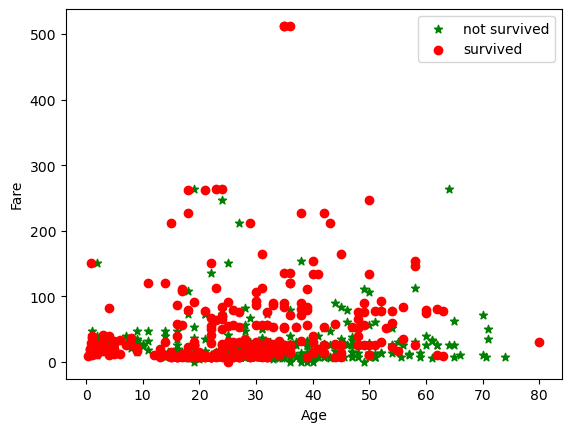

In [16]:
plt.scatter(df[df['Survived'] == 0]['Age'], 
            df[df['Survived'] == 0]['Fare'], color='g', marker='*', label='not survived')
plt.scatter(df[df['Survived'] == 1]['Age'], 
            df[df['Survived'] == 1]['Fare'], color='r',label='survived')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Fare'>

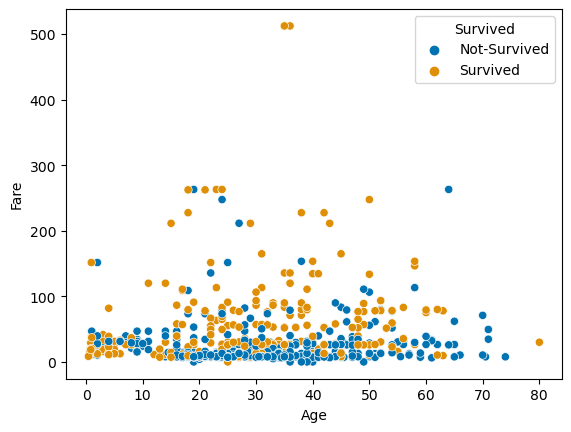

In [17]:
sns.scatterplot(data=df.replace({"Survived":{0:"Not-Survived", 1:"Survived"}}), 
                x="Age", y="Fare", hue="Survived", palette="colorblind")

### Sex vs Fare

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

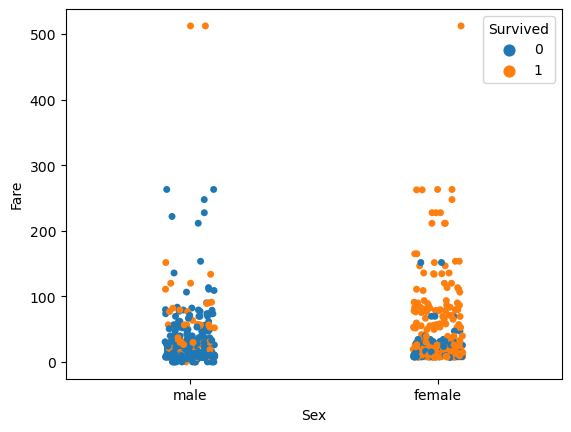

In [18]:
sns.stripplot(data=df, x="Sex", y="Fare", hue="Survived")

### Pairplot (scatter matrix)

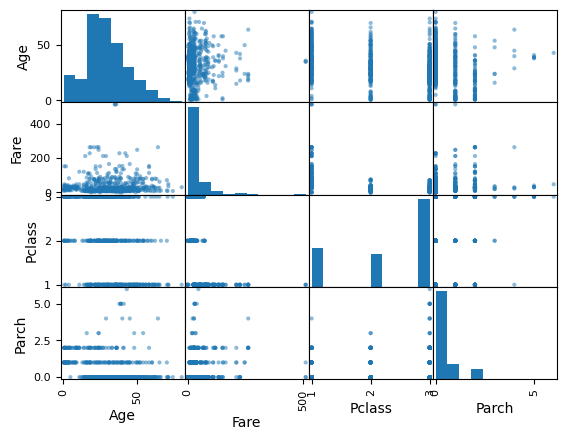

In [19]:
pd.plotting.scatter_matrix(df[['Age', 'Fare', 'Pclass', 'Parch']])
plt.show()

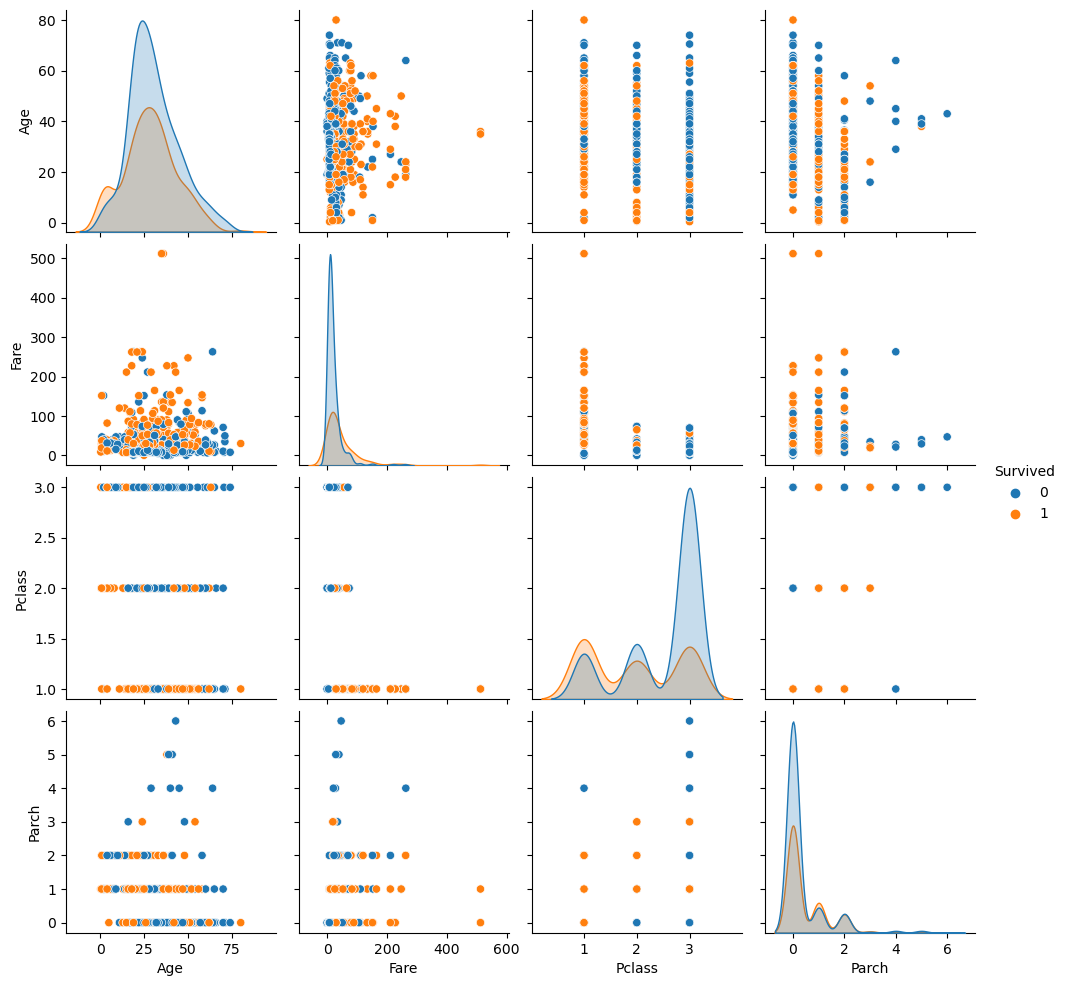

In [20]:
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Parch', "Survived"]], hue="Survived", diag_kind="kde")
plt.show()

In [21]:
df['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [22]:
df[['Age', 'Sex']].head()

,Age,Sex
0,22.0,male
1,38.0,female
2,26.0,female
3,35.0,female
4,35.0,male


In [23]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

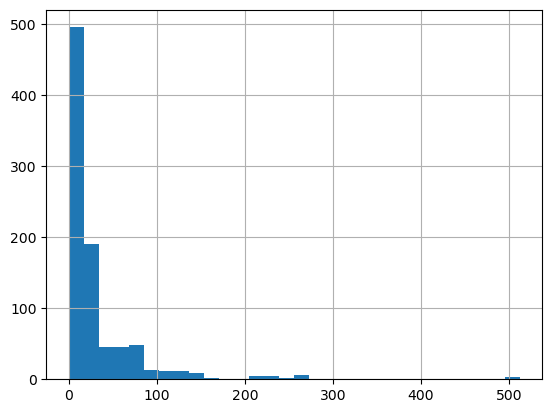

In [24]:
df['Fare'].hist(bins=30)
plt.show()

<AxesSubplot:xlabel='Fare', ylabel='Count'>

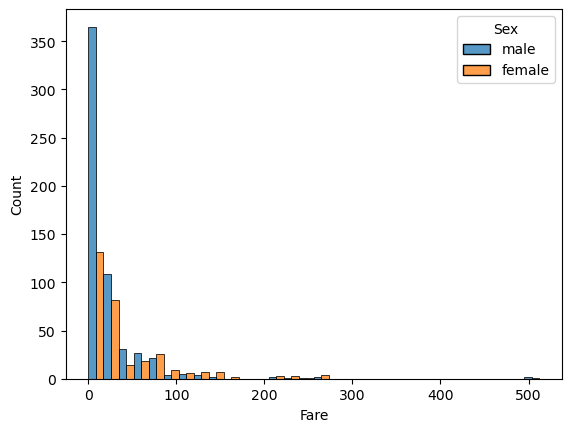

In [25]:
sns.histplot(data=df, x="Fare", hue="Sex", bins=30, multiple="dodge")

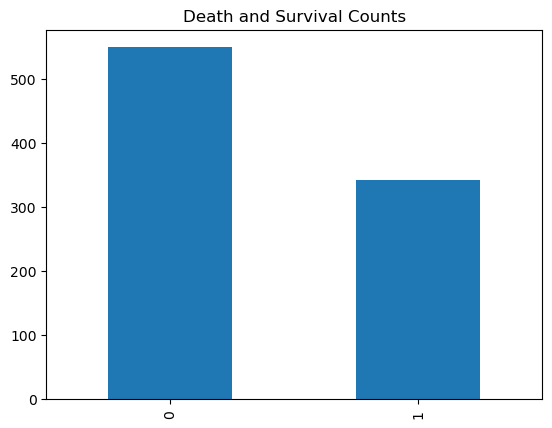

In [26]:
df['Survived'].value_counts().plot(kind='bar', 
                                   title='Death and Survival Counts')
plt.show()

Text(0.5, 1.0, 'Death and Survival Counts')

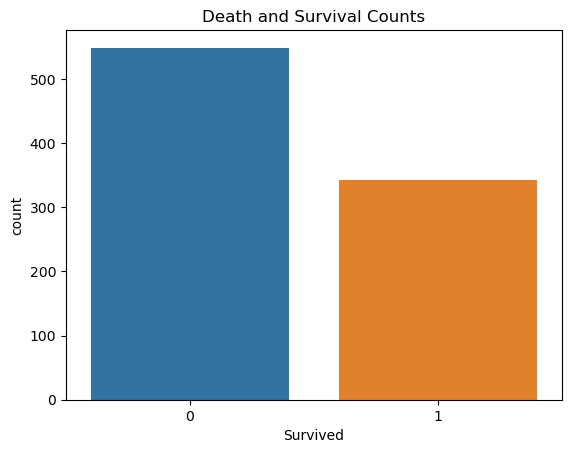

In [27]:
sns.countplot(data=df, x="Survived")
plt.title("Death and Survival Counts")

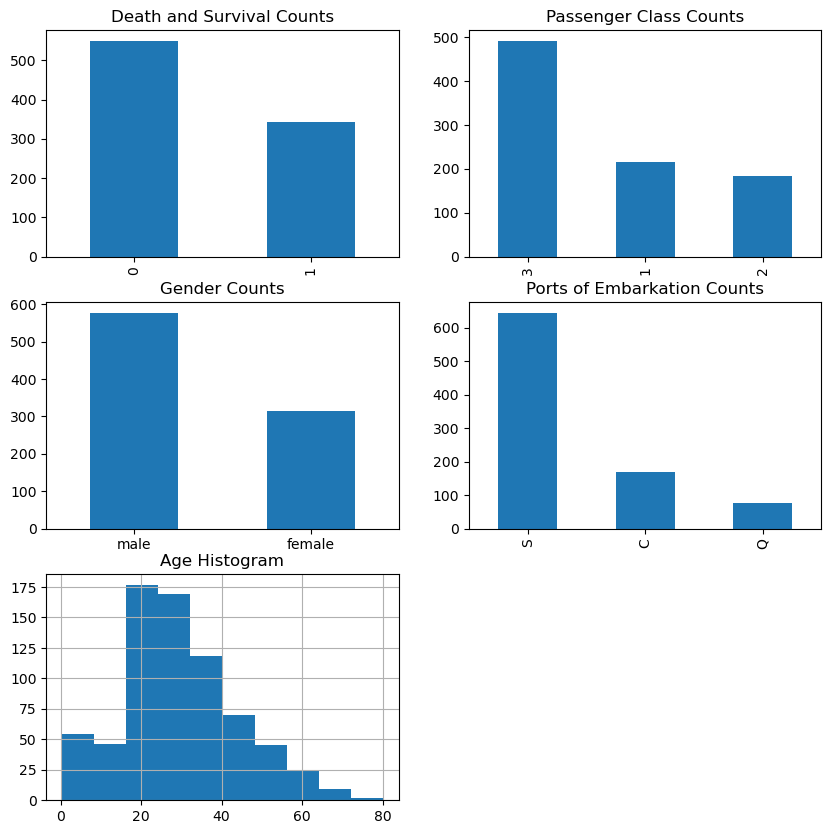

In [28]:
# Set up a grid of plots
fig = plt.figure(figsize=(10, 10)) 
fig_dims = (3, 2)

# Plot death and survival counts
plt.subplot2grid(fig_dims, (0, 0))
df['Survived'].value_counts().plot(kind='bar', 
                                   title='Death and Survival Counts')

# Plot Pclass counts
plt.subplot2grid(fig_dims, (0, 1))
df['Pclass'].value_counts().plot(kind='bar', title='Passenger Class Counts')

# Plot Sex counts
plt.subplot2grid(fig_dims, (1, 0))
df['Sex'].value_counts().plot(kind='bar', title='Gender Counts')
plt.xticks(rotation=0)

# Plot Embarked counts
plt.subplot2grid(fig_dims, (1, 1))
df['Embarked'].value_counts().plot(kind='bar', title='Ports of Embarkation Counts')

# Plot the Age histogram
plt.subplot2grid(fig_dims, (2, 0))
df['Age'].hist()
plt.title('Age Histogram')

plt.show()

/Users/francesco/miniconda3/envs/dm1_2022/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/francesco/miniconda3/envs/dm1_2022/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/francesco/miniconda3/envs/dm1_2022/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result i

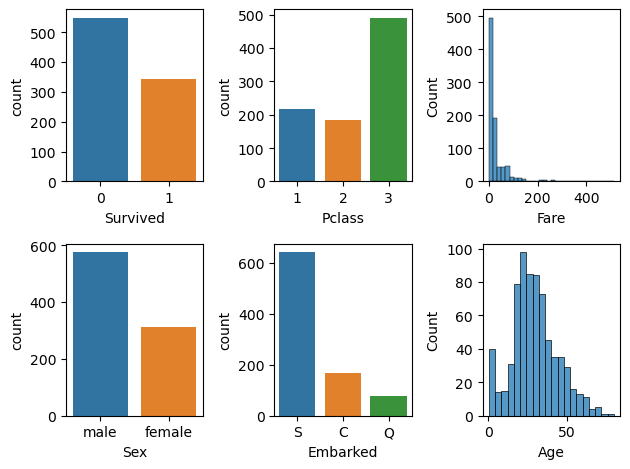

In [29]:
fig, axs = plt.subplots(2,3)
sns.countplot(df['Survived'], ax=axs[0][0])
sns.countplot(df['Pclass'], ax=axs[0][1])
sns.countplot(df['Sex'], ax=axs[1][0])
sns.countplot(df['Embarked'], ax=axs[1][1])
sns.histplot(df['Age'], ax=axs[1][2])
sns.histplot(df['Fare'], ax=axs[0][2], bins=30)
plt.tight_layout()
fig.show()

In [30]:
# Pclass
pclass_xt = pd.crosstab(df['Pclass'], df['Survived'])
pclass_xt

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [31]:
# Normalize the cross tab to sum to 1:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


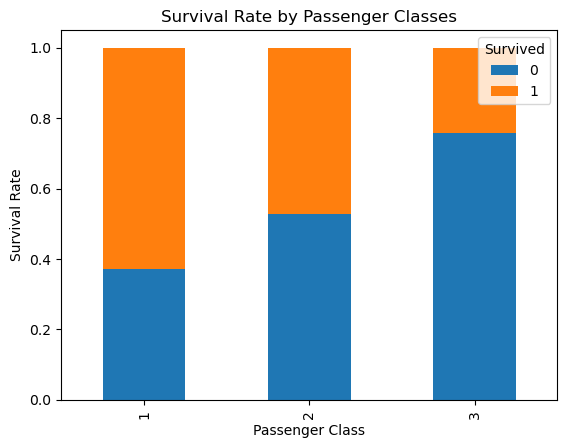

In [32]:
pclass_xt_pct.plot(kind='bar', stacked=True, 
                   title='Survival Rate by Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

In [33]:
# Sex
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [34]:
sexes = sorted(df['Sex'].unique())
genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
genders_mapping

{'female': 0, 'male': 1}

In [35]:
df['Sex_Val'] = df['Sex'].map(genders_mapping).astype(int)
df[['Sex', 'Sex_Val']].head()

,Sex,Sex_Val
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1


([<matplotlib.axis.XTick at 0x7fe842ecf820>,
 [Text(0, 0, 'female'), Text(1, 0, 'male')])

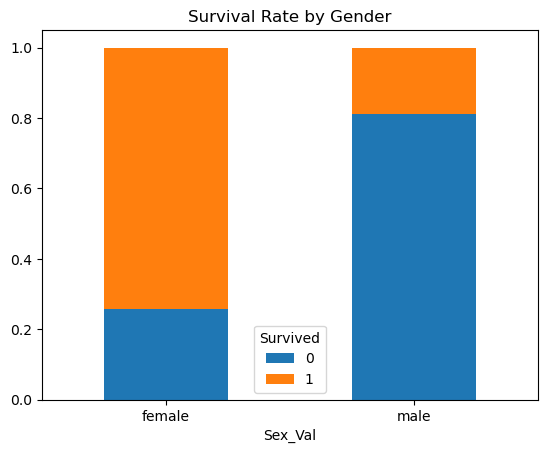

In [36]:
sex_val_xt = pd.crosstab(df['Sex_Val'], df['Survived'])
sex_val_xt_pct = sex_val_xt.div(sex_val_xt.sum(1).astype(float), axis=0)
sex_val_xt_pct.plot(kind='bar', stacked=True, 
                    title='Survival Rate by Gender')
plt.xticks([0, 1], ['female', 'male'], rotation=0)

## Replace Missing Values

### Embarked

In [37]:
# Embarked
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0


In [38]:
df['Embarked'].mode()[0]

'S'

In [39]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [40]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val


In [41]:
# Get the unique values of Embarked
embarked_locs = sorted(df['Embarked'].unique())
embarked_locs_mapping = dict(zip(embarked_locs, range(0, len(embarked_locs) + 1)))
embarked_locs_mapping

{'C': 0, 'Q': 1, 'S': 2}

In [42]:
df['Embarked_Val'] = df['Embarked'].map(embarked_locs_mapping).astype(int)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,2


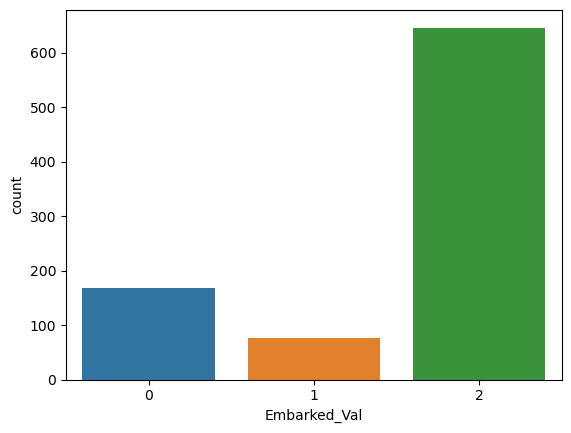

In [43]:
sns.countplot(data=df, x='Embarked_Val')
plt.show()

In [44]:
# Since the vast majority of passengers embarked in 'S': 3, 
# we assign the missing values in Embarked to 'S':
if len(df[df['Embarked'].isnull()] > 0):
    df.replace({'Embarked_Val' : { embarked_locs_mapping[np.nan] : embarked_locs_mapping['S']}}, 
               inplace=True)

In [45]:
embarked_locs = sorted(df['Embarked_Val'].unique())
embarked_locs

[0, 1, 2]

Text(0, 0.5, 'Survival Rate')

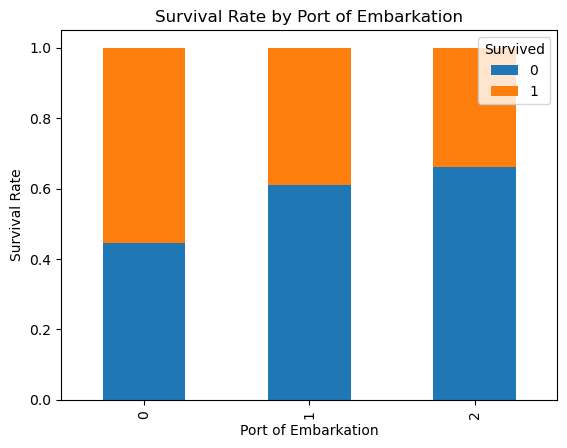

In [46]:
embarked_val_xt = pd.crosstab(df['Embarked_Val'], df['Survived'])
embarked_val_xt_pct = \
    embarked_val_xt.div(embarked_val_xt.sum(1).astype(float), axis=0)
embarked_val_xt_pct.plot(kind='bar', stacked=True)
plt.title('Survival Rate by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

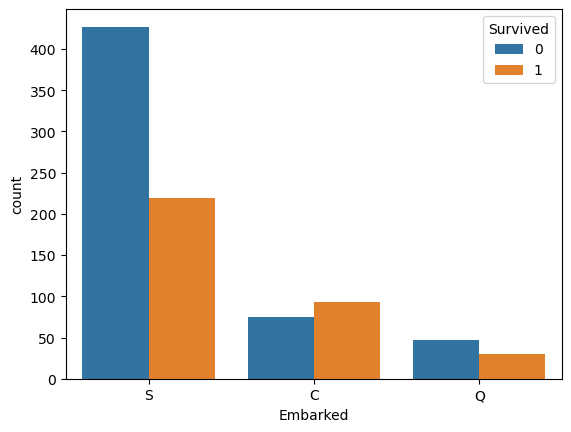

In [47]:
sns.countplot(data=df, x="Embarked", hue="Survived", )

### Age

In [48]:
df['Age'].isnull().sum()

177

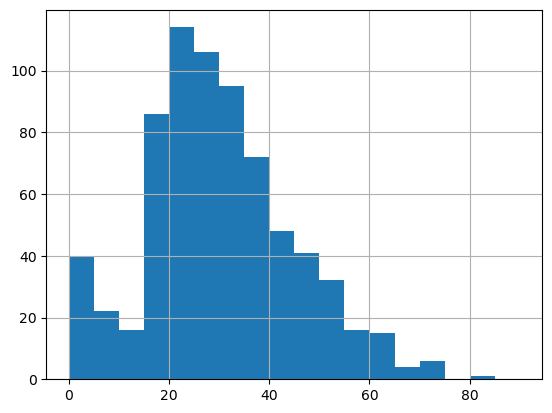

In [49]:
df['Age'].hist(bins=np.arange(0,95,5))
plt.show()

In [50]:
np.mean(df['Age'])

29.69911764705882

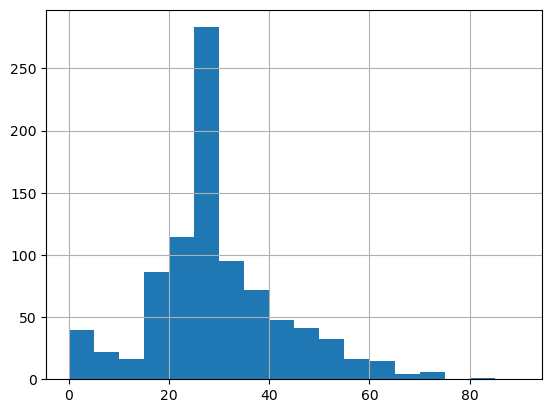

In [51]:
df['Age'].fillna(np.mean(df['Age'])).hist(bins=np.arange(0,95,5))
plt.show()

In [52]:
# Age
df[df['Age'].isnull()][['Sex', 'Pclass', 'Age']].head()

,Sex,Pclass,Age
5,male,3,NaN
17,male,2,NaN
19,female,3,NaN
26,male,3,NaN
28,female,3,NaN


In [53]:
def fun_temp(x):
    return x.fillna(x.mean())

In [54]:
df['Age3'] = df['Age'].groupby(
    [df['Sex'], df['Pclass']]).apply(fun_temp)

In [55]:
df['Age'].groupby(
    [df['Sex'], df['Pclass']]).apply(fun_temp)

0      22.00
1      38.00
2      26.00
3      35.00
4      35.00
       ...  
886    27.00
887    19.00
888    21.75
889    26.00
890    32.00
Name: Age, Length: 891, dtype: float64

In [56]:
df['Age'].groupby(
    [df['Sex'], df['Pclass']]).mean()

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

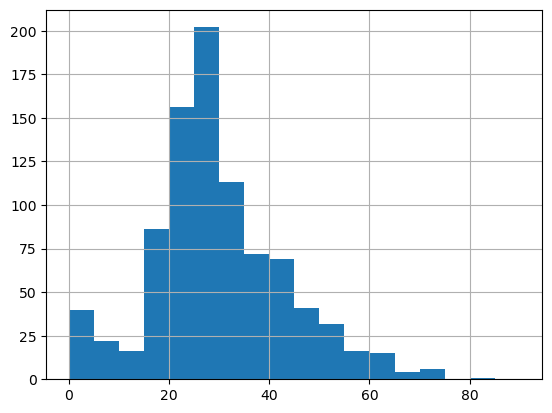

In [57]:
df['Age3'].hist(bins=np.arange(0, 95, 5))
plt.show()

In [58]:
def fun_temp(x):
    return x.fillna(x.median())

28.0


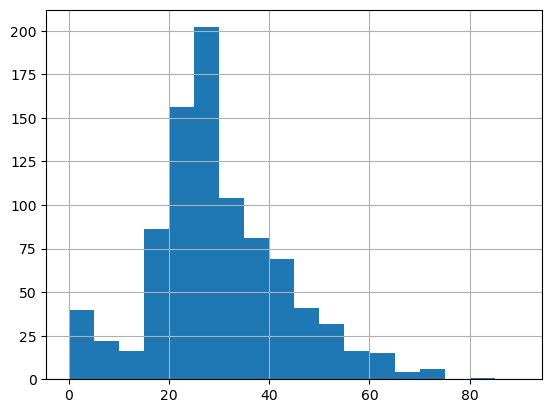

In [59]:
# To keep Age intact, make a copy of it called AgeFill 
# that we will use to fill in the missing ages:
df['AgeFill'] = df['Age']

print(df['Age'].median())

# Populate AgeFill
df['AgeFill'] = df['AgeFill'].groupby(
    [df['Sex_Val'], df['Pclass']]).apply(lambda x: x.fillna(
    x.median()))
df['AgeFill'].hist(bins=np.arange(0, 95, 5))
plt.show()

## Plots

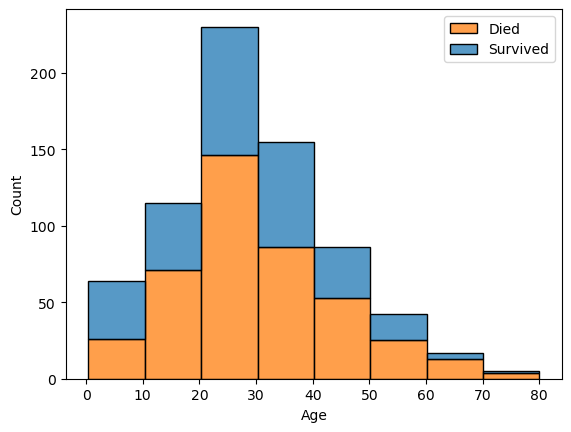

<AxesSubplot:xlabel='Survived', ylabel='Age'>

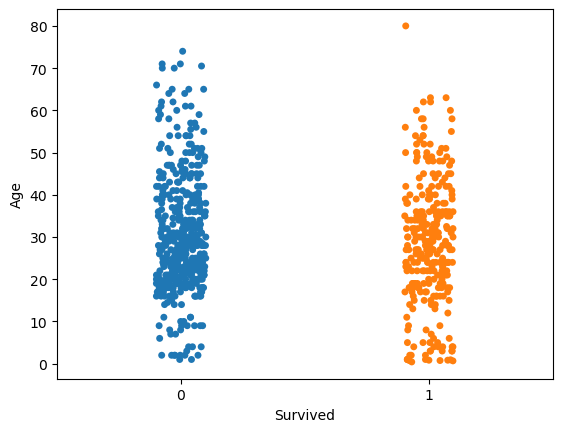

In [60]:
max_age = max(df['AgeFill'])
sns.histplot(data=df, x="Age", hue="Survived", bins=int(max_age / 10), multiple="stack", hue_order=[1, 0])
plt.gca().legend(('Died', 'Survived'), loc='best')
plt.show()

sns.stripplot(data=df, x="Survived", y="Age")

Text(0, 0.5, 'Age')

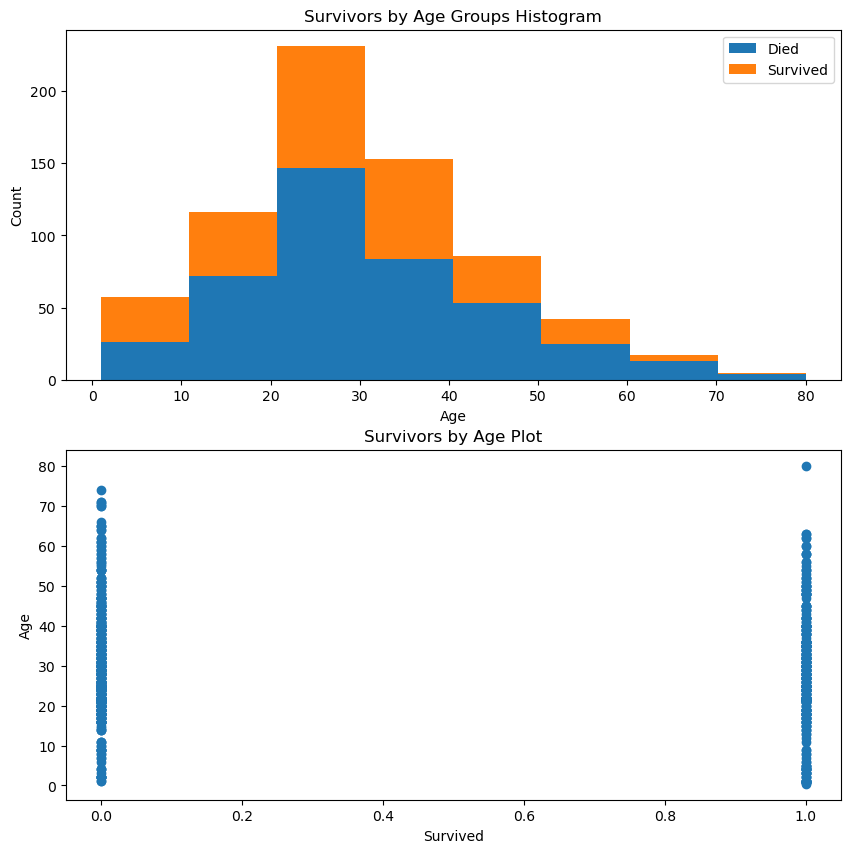

In [61]:
# Set up a grid of plots
fig, axes = plt.subplots(2, 1, figsize=(10,10))

# Histogram of AgeFill segmented by Survived
df1 = df[df['Survived'] == 0]['Age']
df2 = df[df['Survived'] == 1]['Age']
max_age = max(df['AgeFill'])
axes[0].hist([df1, df2], 
             bins=int(max_age / 10), # bin_size
             range=(1, max_age), 
             stacked=True)
axes[0].legend(('Died', 'Survived'), loc='best')
axes[0].set_title('Survivors by Age Groups Histogram')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Scatter plot Survived and AgeFill
axes[1].scatter(df['Survived'], df['AgeFill'])
axes[1].set_title('Survivors by Age Plot')
axes[1].set_xlabel('Survived')
axes[1].set_ylabel('Age')

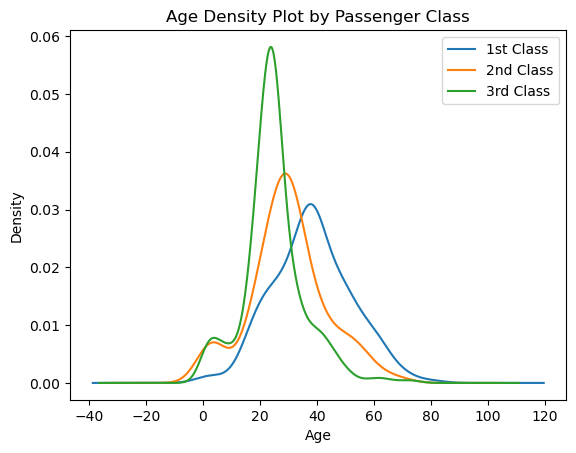

In [62]:
passenger_classes = sorted(df['Pclass'].unique())
for pclass in passenger_classes:
    df.AgeFill[df.Pclass == pclass].plot(kind='kde') #Generate Kernel Density Estimate plot using Gaussian kernels.
plt.title('Age Density Plot by Passenger Class')
plt.xlabel('Age')
plt.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Density'>

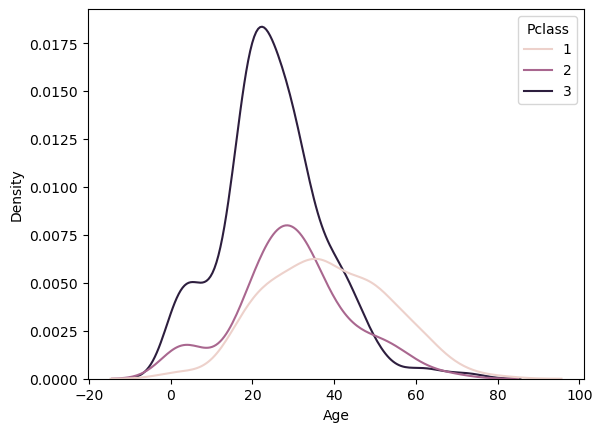

In [63]:
sns.kdeplot(data=df, x="Age", hue="Pclass")

<AxesSubplot:>

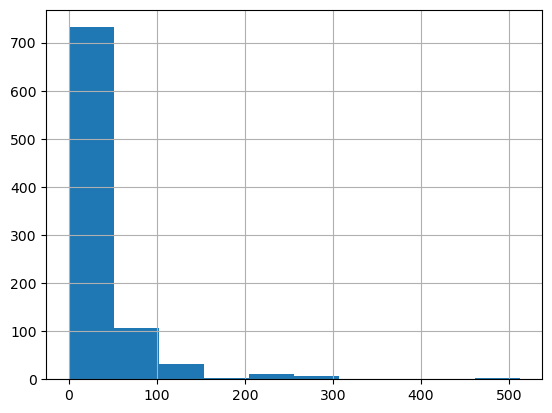

In [64]:
df['Fare'].hist(bins=10)

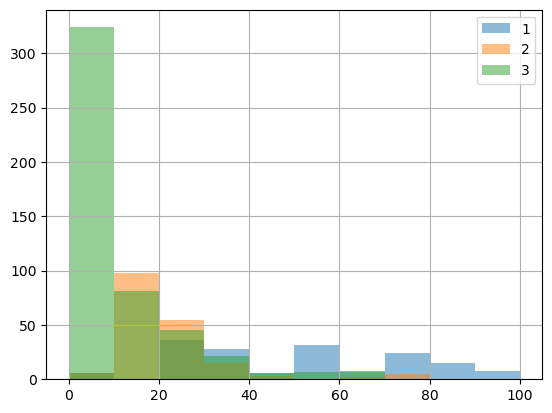

In [65]:
df[df['Pclass'] == 1]['Fare'].hist(bins=np.arange(0, 110, 10), 
                                   label='1', alpha=0.5)
df[df['Pclass'] == 2]['Fare'].hist(bins=np.arange(0, 110, 10),
                                  label='2', alpha=0.5)
df[df['Pclass'] == 3]['Fare'].hist(bins=np.arange(0, 110, 10),
                                  label='3', alpha=0.5)
plt.legend()
plt.show()

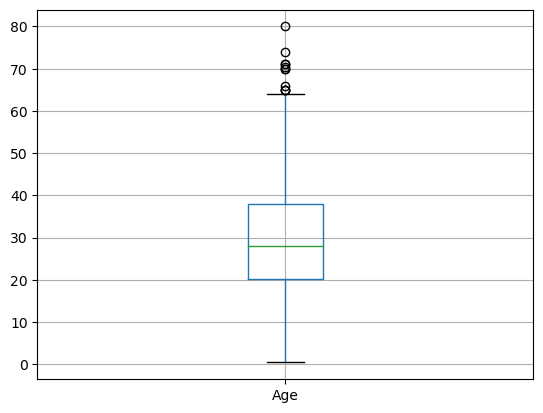

In [66]:
boxplot = df.boxplot(column=['Age'])

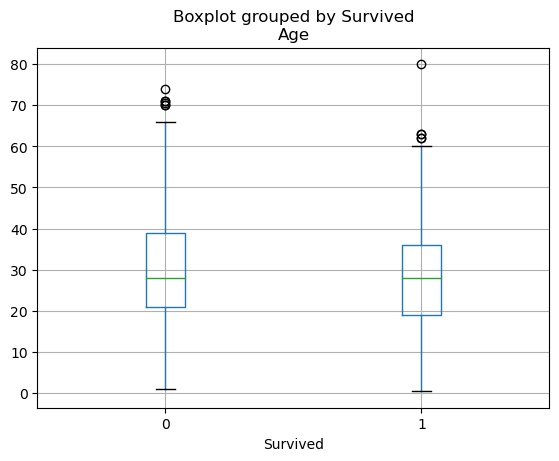

In [67]:
boxplot = df.boxplot(column=['Age'], by='Survived')

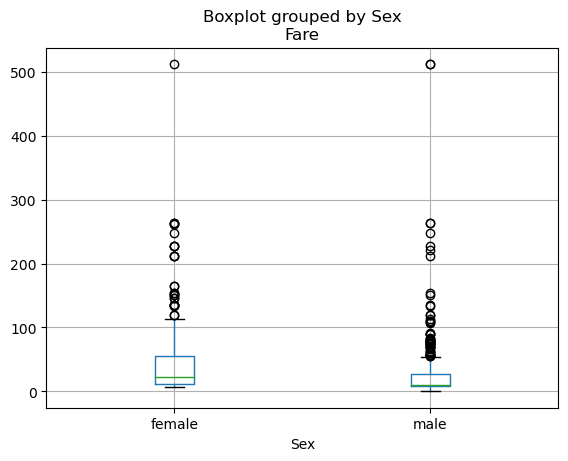

In [68]:
boxplot = df.boxplot(column=['Fare'], by='Sex')

In [69]:
df_sns = df.melt(value_vars=["Age", "Fare"], id_vars=["Survived", "Pclass", "Sex", "Embarked"])
df_sns

,Survived,Pclass,Sex,Embarked,variable,value
0,0,3,male,S,Age,22.00
1,1,1,female,C,Age,38.00
2,1,3,female,S,Age,26.00
3,1,1,female,S,Age,35.00
4,0,3,male,S,Age,35.00
...,...,...,...,...,...,...
1777,0,2,male,S,Fare,13.00
1778,1,1,female,S,Fare,30.00
1779,0,3,female,S,Fare,23.45
1780,1,1,male,C,Fare,30.00


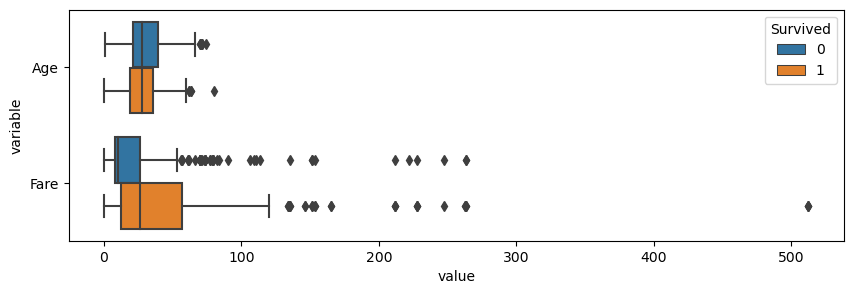

In [70]:
plt.figure(figsize=(10, 3))
sns.boxplot(data=df_sns, x="value", y="variable", hue="Survived", orient="h")
plt.show()

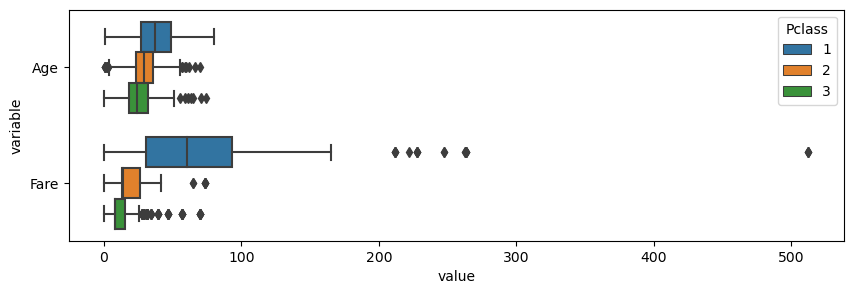

In [71]:
plt.figure(figsize=(10, 3))
sns.boxplot(data=df_sns, x="value", y="variable", hue="Pclass", orient="h")
plt.show()

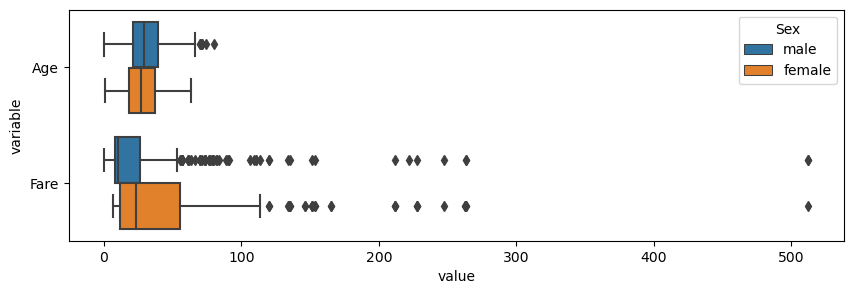

In [72]:
plt.figure(figsize=(10, 3))
sns.boxplot(data=df_sns, x="value", y="variable", hue="Sex", orient="h")
plt.show()